In [2]:
import numpy as np
import scipy.sparse as sparse
import scipy.linalg as sla
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from common import set_figure
set_figure()

Let's make a *random* sparse matrix

First we'll set the density so that
$$
density = \frac{nnz(A)}{n^2}
$$

In [3]:
n = 100
density = 10.0 / n # 10 points per row
nnz = int(n*n*density)

Now make the entries:

In [4]:
row = np.random.random_integers(low=0, high=n-1, size=nnz)
col = np.random.random_integers(low=0, high=n-1, size=nnz)
data = np.ones(nnz, dtype=float)

A = sparse.coo_matrix((data, (row, col)), shape=(n, n))
print(A.dtype)

float64


/var/folders/7n/6_pkgj9x4n1d81sq7d0mq4tm0000gn/T/ipykernel_29782/340871966.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 99 + 1) instead
  row = np.random.random_integers(low=0, high=n-1, size=nnz)
/var/folders/7n/6_pkgj9x4n1d81sq7d0mq4tm0000gn/T/ipykernel_29782/340871966.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 99 + 1) instead
  col = np.random.random_integers(low=0, high=n-1, size=nnz)


But let's make it positive definite:

In [5]:
A.data[:] = -1.0                   # -1 for off-diagonals
rowsum = -np.array(A.sum(axis=1)) + 1 # positive rowsum
rowsum = rowsum.ravel()
A.setdiag(rowsum)

In [6]:
u = np.random.rand(n)
v = np.random.rand(n)

In [7]:
A = A.tocsc()
%timeit s = spla.splu(A)

316 µs ± 6.83 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


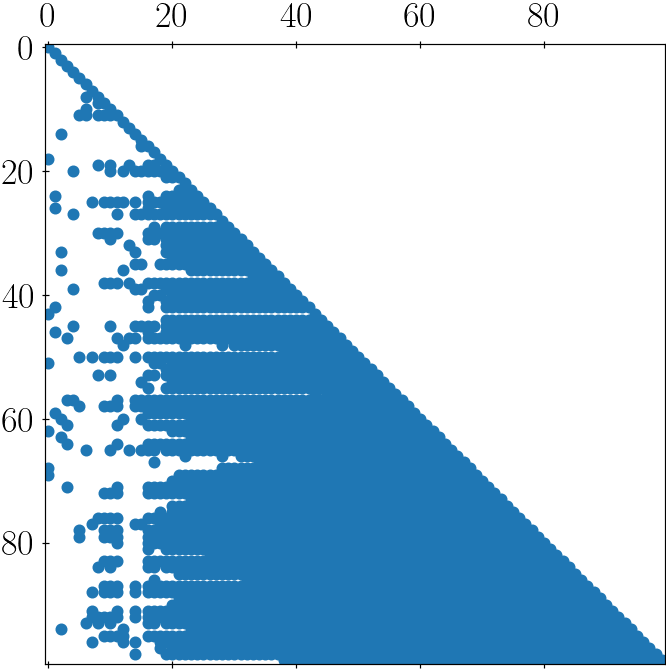

In [8]:
s = spla.splu(A)
plt.spy(s.L, marker='.')

In [9]:
B = A.todense()

In [10]:
%timeit p, L, U = sla.lu(B)

245 µs ± 6.45 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


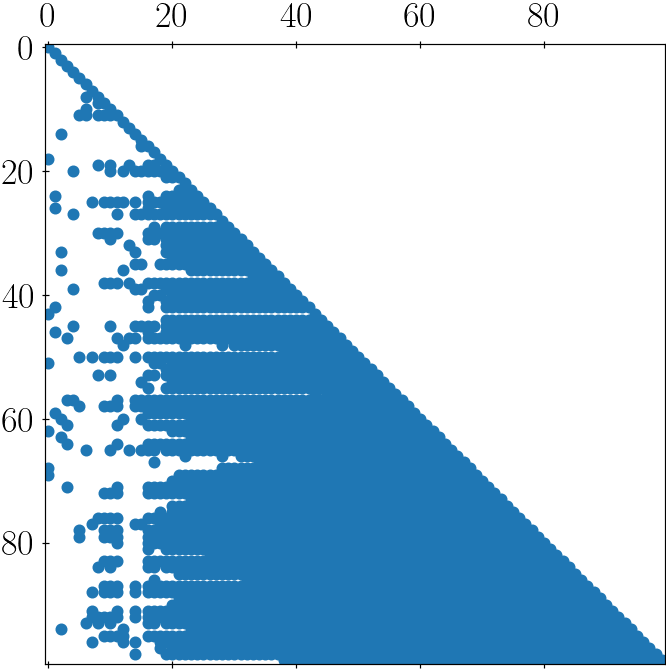

In [11]:
s = spla.splu(A)
plt.spy(s.L, marker='.')

In [12]:
%timeit u = A * v

4.26 µs ± 145 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
